In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import utils

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [3]:
prefix = ''
order = np.load(prefix+'ordering.npz')
params = order['params']
values = order['values']

print params
print values

[[u'stimulus', u'jitter', u'peak'] [u'connectivity', u'Wcc_factor']]
[[2.0, 10.0, 50.0] [1.0, 1.7]]


In [4]:
peaks = values[0]
clusters = values[1]

In [5]:
data = [[np.load(prefix+'result-{}-{}.npz'.format(i, j)) for j in range(len(values[1]))] for i in range(len(values[0]))] 
data[0][0].keys()

['spike_ids_post',
 'xc_scores_pre',
 'stimulus',
 'spike_times_post',
 'spike_scores_pre',
 'spike_times_pre',
 'spike_scores_post',
 'xc_scores_post',
 'ablated',
 'spike_ids_pre']

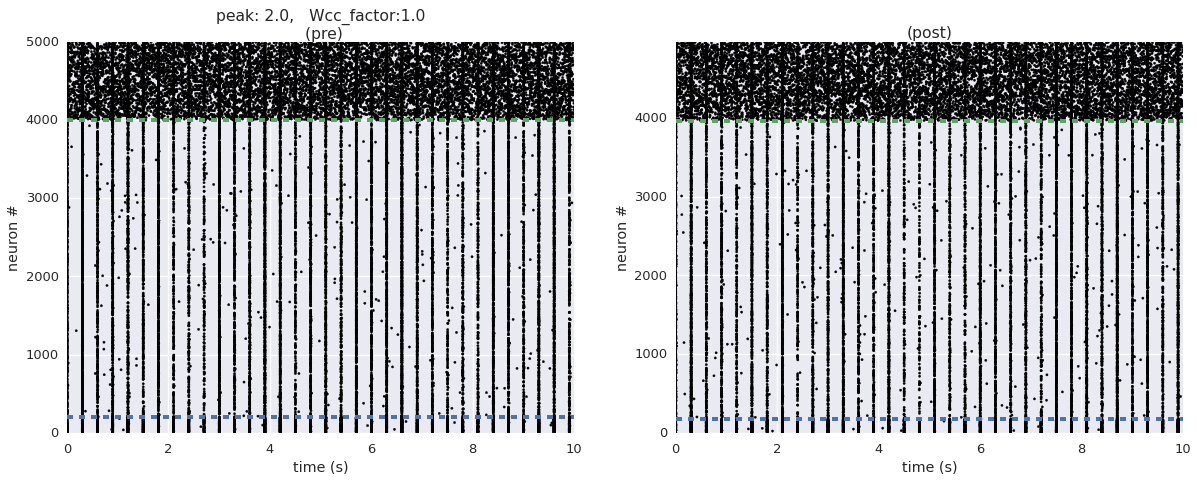

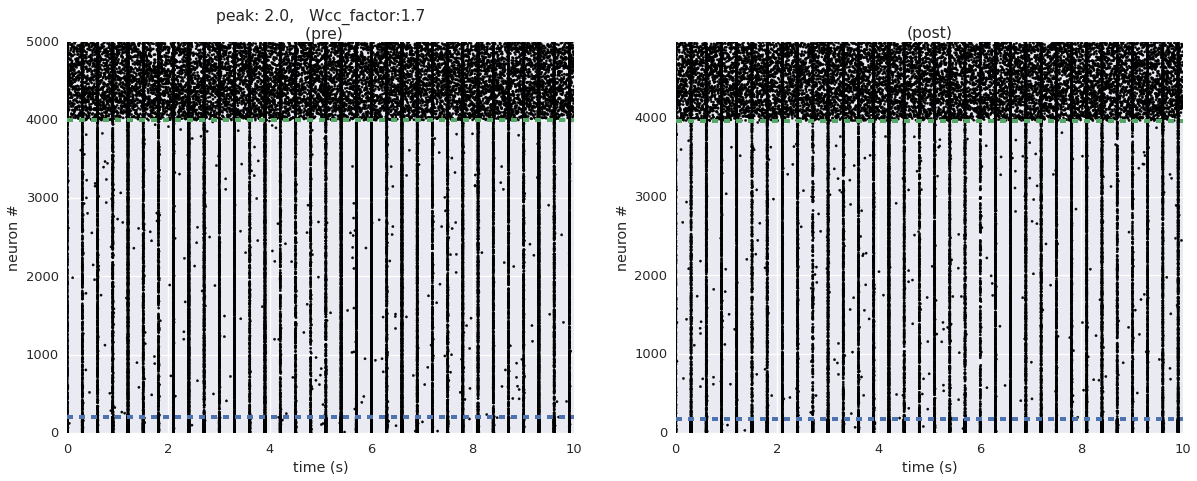

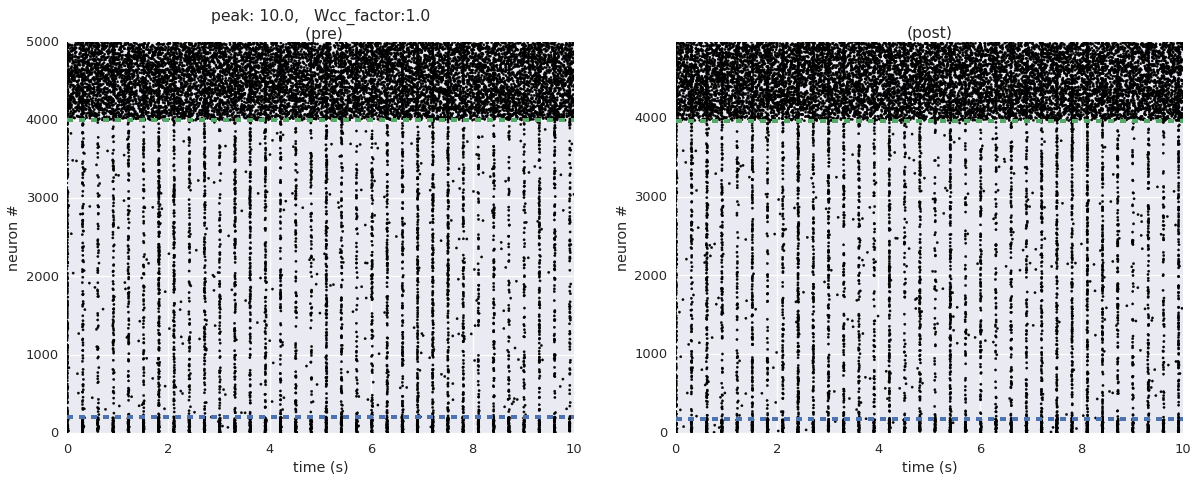

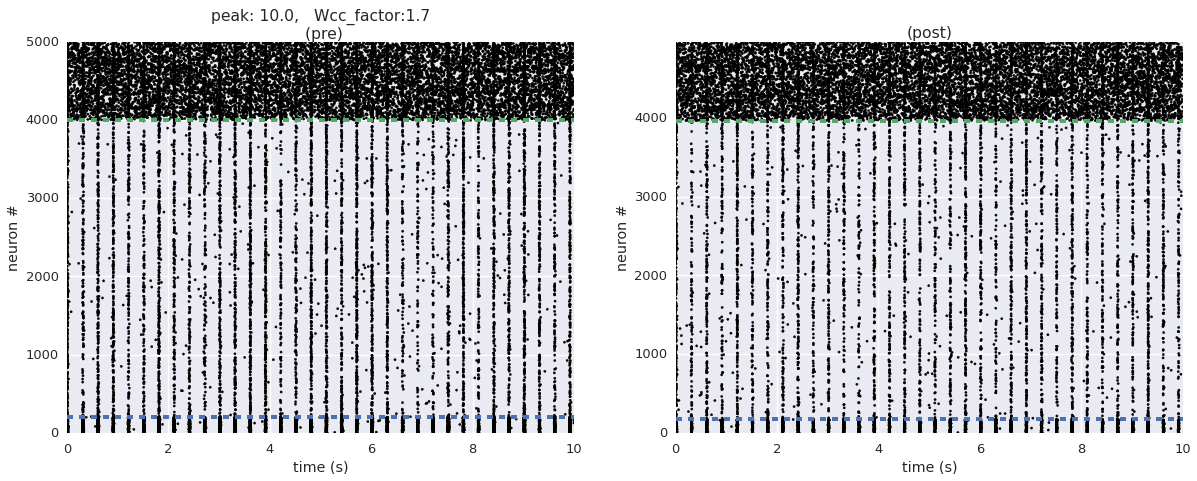

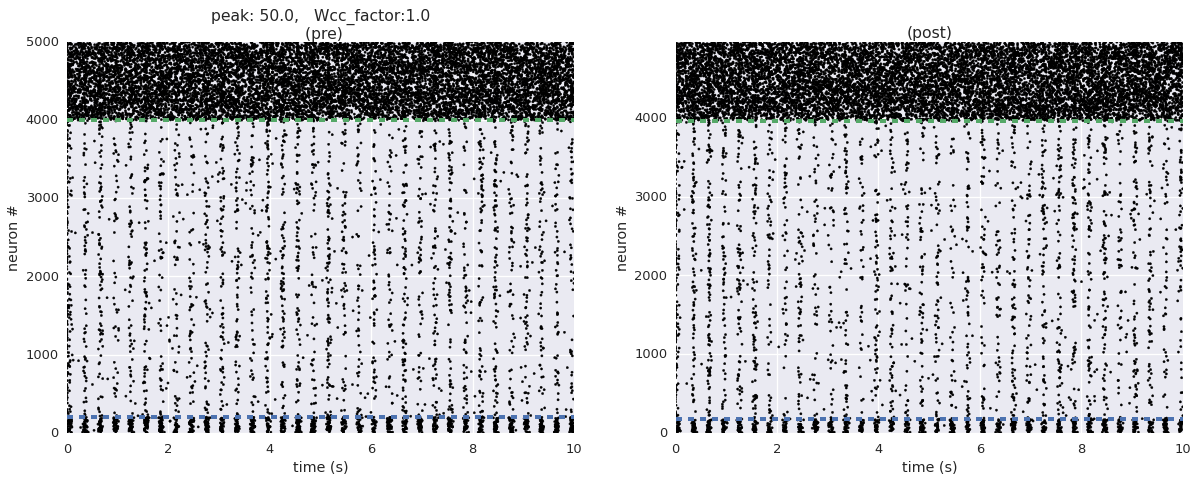

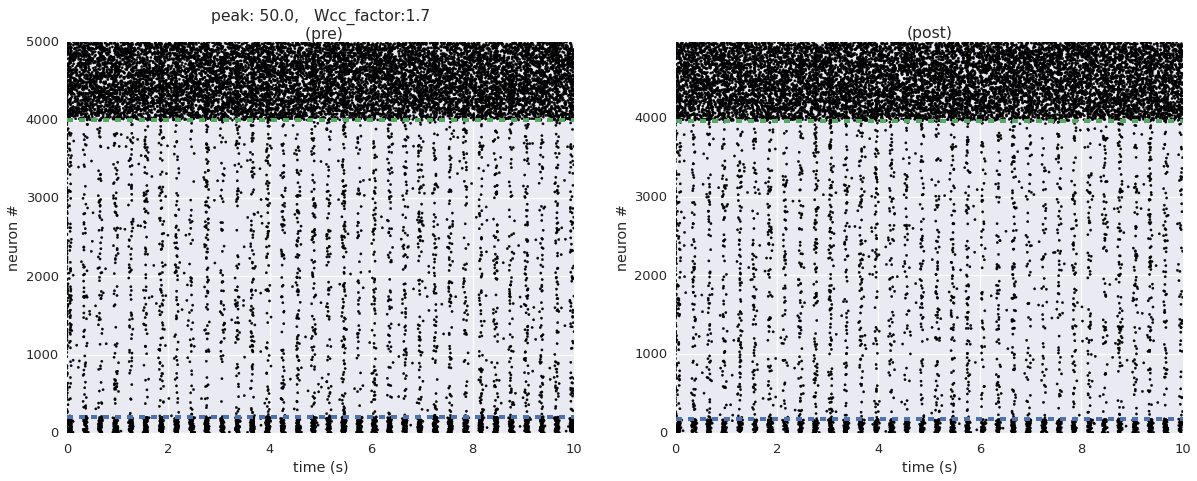

In [6]:
title_string = params[0][-1] + ': {},   ' + params[1][-1] + ':{}'
for (i, peak) in enumerate(peaks):
    for (j ,cluster) in enumerate(clusters):
        
        d = data[i][j]
        times_pre, ids_pre = d['spike_times_pre'], d['spike_ids_pre']
        times_post, ids_post = d['spike_times_post'], d['spike_ids_post']
        ablated = d['ablated']
        
        inds_pre = [0, 200, 4000, 5000]
        inds_post = utils.newInds(inds_pre, ablated)
        
        plt.figure(figsize=(20,7))
        
        plt.subplot(1,2,1)
        utils.plotSpikes(times_pre, ids_pre, lines=inds_pre[1:-1])
        plt.title(title_string.format(peak, cluster)+'\n (pre)')
        #plt.xlim([0, 3])
        
        plt.subplot(1,2,2)
        utils.plotSpikes(times_post, ids_post, lines=inds_post[1:-1], ablated=ablated)
        plt.title('(post)')
        #plt.xlim([0, 3])

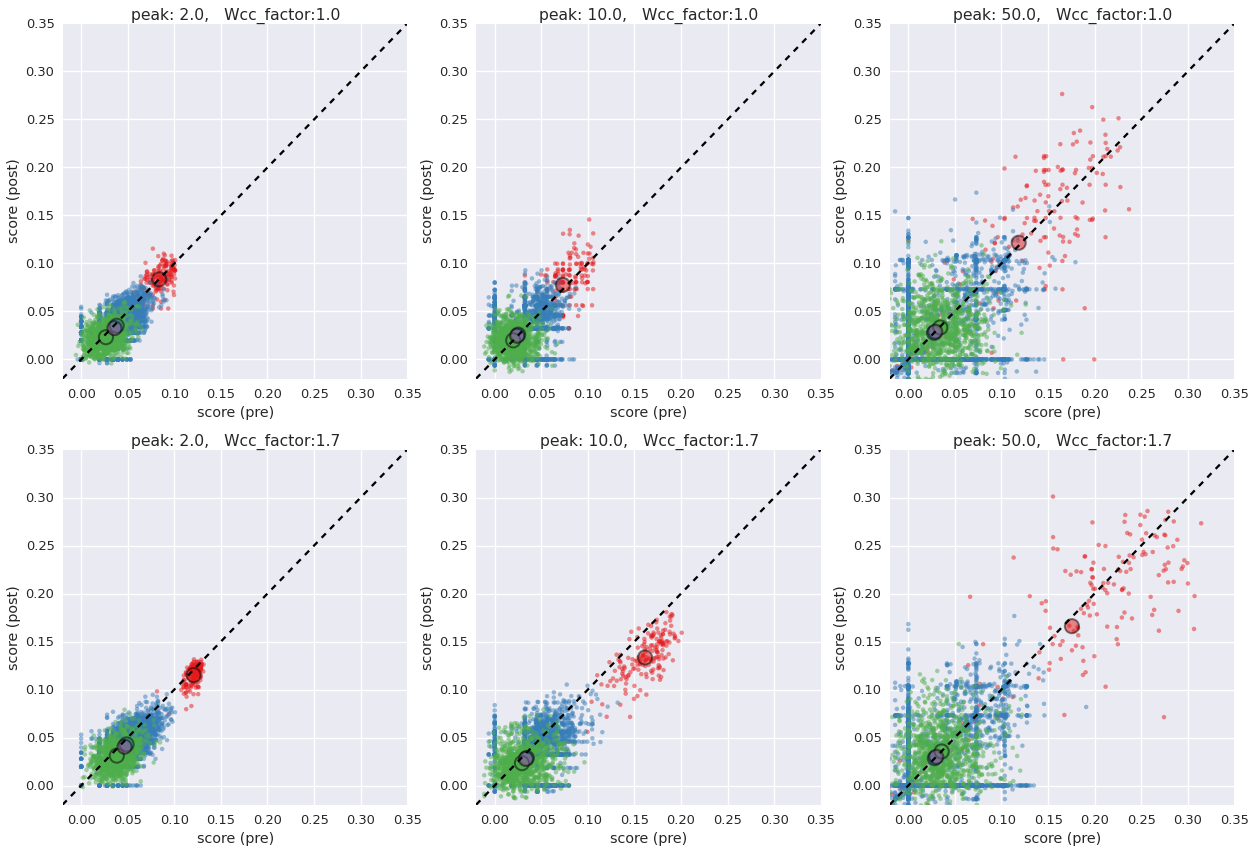

In [8]:
reload(utils)
inds_pre = [0, 200, 4000, 5000]
title_string = params[0][-1] + ': {},   ' + params[1][-1] + ':{}'
plt.figure(figsize=(21,14))
for (i, peak) in enumerate(peaks):
    for (j ,cluster) in enumerate(clusters):
        
        inds_post = utils.newInds(inds_pre, ablated)
        
        d = data[i][j]
        scores_pre, scores_post = d['xc_scores_pre'], d['xc_scores_post']
        #scores_pre, scores_post = d['spike_scores_pre'], d['spike_scores_post']
        ablated = d['ablated']
        
        scores_pre = np.delete(scores_pre, ablated)
        scores_post = np.delete(scores_post, ablated)
        
        plt.subplot(len(clusters), len(peaks), len(peaks)*j + i + 1),
        utils.beforeAndAfterPlot(scores_pre, scores_post, inds_post, limits=[-0.02, 0.35], extra=True)
        plt.title(title_string.format(peak, cluster))
        
plt.savefig('scatterplots.eps')